In [1]:
import numpy as np
import scipy.special as scipy
import matplotlib.pyplot

%matplotlib inline

In [2]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
                
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))        
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.expit(x)
        
    def train(self, inputs_list, targets_list):
        # convert inputs into a 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from the hidden lay
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # calculate the output errors
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    def query(self, input_list):
        print(len(self.who))
        
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
for record in training_data_list:
    all_values = record.split(",")
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + .01
    targets[int(all_values[0])] = .99
    n.train(inputs, targets)

In [6]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [10]:
all_values = test_data_list[2].split(",")
print(all_values[0])

1


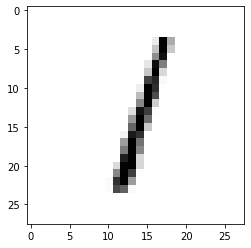

In [11]:
image_array = np.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [12]:
n.query((np.asfarray(all_values[1:]) / 255.0 * .99) + 0.01)

10


array([[6.77347312e-04],
       [9.94181124e-01],
       [4.00264744e-03],
       [3.26925413e-03],
       [7.50689422e-03],
       [2.24003233e-03],
       [5.08668446e-03],
       [1.34660745e-02],
       [1.12920690e-03],
       [1.84970124e-02]])